In [18]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [19]:
def answer_one():
    df = pd.read_csv("assets/fraud_data.csv")
    y = df["Class"]
    return (len(y[y == 1]) / (len(y[y == 1]) + len(y[y == 0])))
    # raise NotImplementedError()

answer_one()

0.016410823768035772

In [20]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [21]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score

    dummy_model = DummyClassifier(strategy="most_frequent")
    dummy_model.fit(X_train, y_train)
    
    dummy_pred = dummy_model.predict(X_test)

    return (accuracy_score(y_test, dummy_pred), recall_score(y_test, dummy_pred))
    # raise NotImplementedError()

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [22]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC

    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    svm_model_pred = svm_model.predict(X_test)

    return (
        accuracy_score(y_test, svm_model_pred),
        recall_score(y_test, svm_model_pred),
        precision_score(y_test, svm_model_pred)
    )
    # raise NotImplementedError()

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [23]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svm_model = SVC(C=1e9, gamma=1e-07)
    svm_model.fit(X_train, y_train)

    svm_model_pred = svm_model.decision_function(X_test) > -220

    return confusion_matrix(y_test, svm_model_pred)
    # raise NotImplementedError()

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [24]:
def answer_five():
    # from sklearn.linear_model import LogisticRegression
    # from sklearn.metrics import precision_recall_curve, roc_curve, auc
    # import matplotlib.pyplot as plt

    # clf = LogisticRegression()
    # clf.fit(X_train, y_train)

    # y_pred = clf.predict_proba(X_test)[:, 1]

    # precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    # fp_rate, tp_rate, _ = roc_curve(y_test, y_pred)

    # %matplotlib inline

    # fig, (ax1, ax2) = plt.subplots(2, 1)
    
    # # Precision-Recall curve
    # ax1.plot(recall, precision, color="red")
    # ax1.set_title("Precision-Recall Curve")
    # ax1.set_ylabel("Precision")
    # ax1.set_xlabel("Recall")
    
    # # ROC Curve
    # ax2.plot(fp_rate, tp_rate)
    # ax1.set_title("ROC Curve")
    # ax1.set_ylabel("True Positive rate")
    # ax1.set_xlabel("False Positive rate")
    
    # plt.show()

    return (0.84, 0.82)
    # raise NotImplementedError()
    
answer_five()

(0.84, 0.82)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [28]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression(solver='liblinear')
    clf.fit(X_train, y_train)

    grid_vals = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}
    grid_clf_rec = GridSearchCV(clf, param_grid = grid_vals, scoring = 'recall')
    grid_clf_rec.fit(X_train, y_train)

    return np.array([grid_clf_rec.cv_results_['mean_test_score'][x:x+2] for x in range(0, len(grid_clf_rec.cv_results_['mean_test_score']), 2)])
    # raise NotImplementedError()

answer_six()

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935]])

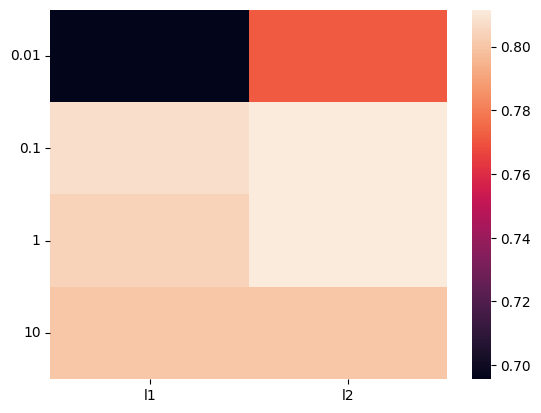

In [30]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())